<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDB0201ENSkillsNetwork22-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# Accessing Databases with SQL Magic


Estimated time needed: **15** minutes
    

## Objectives

After completing this lab you will be able to:

* Perform simplified database access using SQL "magic"


##### To communicate with SQL Databases from within a JupyterLab notebook, we can use the SQL "magic" provided by the [ipython-sql](https://github.com/catherinedevlin/ipython-sql) extension. "Magic" is JupyterLab's term for special commands that start with "%". Below, we'll use the _load_\__ext_ magic to load the ipython-sql extension. In the lab environemnt provided in the course the ipython-sql extension is already installed and so is the ibm_db_sa driver. 

The following required modules are pre-installed in the Skills Network Labs environment. However if you run this notebook commands in a different Jupyter environment (e.g. Watson Studio or Ananconda) you may need to install these libraries by removing the `#` sign before `!pip` in the code cell below.


In [1]:
%load_ext sql

##### Now we have access to SQL magic. With our first SQL magic command, we'll connect to a Db2 database. However, in order to do that, you'll first need to retrieve or create your credentials to access your Db2 database.


<a ><img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DB0201EN-SkillsNetwork/labs/Module%205/images/details.png" width="1000," align="center"></a>
  <h5 align=center>  This image shows the location of your connection string if you're using Db2 on IBM Cloud. If you're using another host the format is: username:password@hostname:port/database-name?security=SSL
  </h5>


In [2]:
# Enter your Db2 credentials in the connection string below
# Recall you created Service Credentials in Part III of the first lab of the course in Week 1
# i.e. from the uri field in the Service Credentials copy everything after db2:// (but remove the double quote at the end)
# for example, if your credentials are as in the screenshot above, you would write:
# %sql ibm_db_sa://my-username:my-password@hostname:port/BLUDB?security=SSL
# Note the ibm_db_sa:// prefix instead of db2://
# This is because JupyterLab's ipython-sql extension uses sqlalchemy (a python SQL toolkit)
# which in turn uses IBM's sqlalchemy dialect: ibm_db_sa

dsn_hostname = "9938aec0-8105-433e-8bf9-0fbb7e483086.c1ogj3sd0tgtu0lqde00.databases.appdomain.cloud"
dsn_uid = "hdf12263"
dsn_pwd = "Qv9RSastIWz2nbIU"
dsn_database = "bludb"
dsn_port = "32459"
dsn_protocol = "TCPIP"
dsn_security = "SSL"

connection_string = 'ibm_db_sa://{0}:{1}@{2}:{3}/{4}?security={5}'.format(dsn_uid, dsn_pwd, dsn_hostname, dsn_port, dsn_database, dsn_security)

In [3]:
print(connection_string)

ibm_db_sa://hdf12263:Qv9RSastIWz2nbIU@9938aec0-8105-433e-8bf9-0fbb7e483086.c1ogj3sd0tgtu0lqde00.databases.appdomain.cloud:32459/bludb?security=SSL


In [4]:
%sql ibm_db_sa://hdf12263:Qv9RSastIWz2nbIU@9938aec0-8105-433e-8bf9-0fbb7e483086.c1ogj3sd0tgtu0lqde00.databases.appdomain.cloud:32459/bludb?security=SSL

##### For convenience, we can use %%sql (two %'s instead of one) at the top of a cell to indicate we want the entire cell to be treated as SQL. Let's use this to create a table and fill it with some test data for experimenting.


In [5]:
%%sql

CREATE TABLE INTERNATIONAL_STUDENT_TEST_SCORES (
	country VARCHAR(50),
	first_name VARCHAR(50),
	last_name VARCHAR(50),
	test_score INT
);
INSERT INTO INTERNATIONAL_STUDENT_TEST_SCORES (country, first_name, last_name, test_score)
VALUES
('United States', 'Marshall', 'Bernadot', 54),
('Ghana', 'Celinda', 'Malkin', 51),
('Ukraine', 'Guillermo', 'Furze', 53),
('Greece', 'Aharon', 'Tunnow', 48),
('Russia', 'Bail', 'Goodwin', 46),
('Poland', 'Cole', 'Winteringham', 49),
('Sweden', 'Emlyn', 'Erricker', 55),
('Russia', 'Cathee', 'Sivewright', 49),
('China', 'Barny', 'Ingerson', 57),
('Uganda', 'Sharla', 'Papaccio', 55),
('China', 'Stella', 'Youens', 51),
('Poland', 'Julio', 'Buesden', 48),
('United States', 'Tiffie', 'Cosely', 58),
('Poland', 'Auroora', 'Stiffell', 45),
('China', 'Clarita', 'Huet', 52),
('Poland', 'Shannon', 'Goulden', 45),
('Philippines', 'Emylee', 'Privost', 50),
('France', 'Madelina', 'Burk', 49),
('China', 'Saunderson', 'Root', 58),
('Indonesia', 'Bo', 'Waring', 55),
('China', 'Hollis', 'Domotor', 45),
('Russia', 'Robbie', 'Collip', 46),
('Philippines', 'Davon', 'Donisi', 46),
('China', 'Cristabel', 'Radeliffe', 48),
('China', 'Wallis', 'Bartleet', 58),
('Moldova', 'Arleen', 'Stailey', 38),
('Ireland', 'Mendel', 'Grumble', 58),
('China', 'Sallyann', 'Exley', 51),
('Mexico', 'Kain', 'Swaite', 46),
('Indonesia', 'Alonso', 'Bulteel', 45),
('Armenia', 'Anatol', 'Tankus', 51),
('Indonesia', 'Coralyn', 'Dawkins', 48),
('China', 'Deanne', 'Edwinson', 45),
('China', 'Georgiana', 'Epple', 51),
('Portugal', 'Bartlet', 'Breese', 56),
('Azerbaijan', 'Idalina', 'Lukash', 50),
('France', 'Livvie', 'Flory', 54),
('Malaysia', 'Nonie', 'Borit', 48),
('Indonesia', 'Clio', 'Mugg', 47),
('Brazil', 'Westley', 'Measor', 48),
('Philippines', 'Katrinka', 'Sibbert', 51),
('Poland', 'Valentia', 'Mounch', 50),
('Norway', 'Sheilah', 'Hedditch', 53),
('Papua New Guinea', 'Itch', 'Jubb', 50),
('Latvia', 'Stesha', 'Garnson', 53),
('Canada', 'Cristionna', 'Wadmore', 46),
('China', 'Lianna', 'Gatward', 43),
('Guatemala', 'Tanney', 'Vials', 48),
('France', 'Alma', 'Zavittieri', 44),
('China', 'Alvira', 'Tamas', 50),
('United States', 'Shanon', 'Peres', 45),
('Sweden', 'Maisey', 'Lynas', 53),
('Indonesia', 'Kip', 'Hothersall', 46),
('China', 'Cash', 'Landis', 48),
('Panama', 'Kennith', 'Digance', 45),
('China', 'Ulberto', 'Riggeard', 48),
('Switzerland', 'Judy', 'Gilligan', 49),
('Philippines', 'Tod', 'Trevaskus', 52),
('Brazil', 'Herold', 'Heggs', 44),
('Latvia', 'Verney', 'Note', 50),
('Poland', 'Temp', 'Ribey', 50),
('China', 'Conroy', 'Egdal', 48),
('Japan', 'Gabie', 'Alessandone', 47),
('Ukraine', 'Devlen', 'Chaperlin', 54),
('France', 'Babbette', 'Turner', 51),
('Czech Republic', 'Virgil', 'Scotney', 52),
('Tajikistan', 'Zorina', 'Bedow', 49),
('China', 'Aidan', 'Rudeyeard', 50),
('Ireland', 'Saunder', 'MacLice', 48),
('France', 'Waly', 'Brunstan', 53),
('China', 'Gisele', 'Enns', 52),
('Peru', 'Mina', 'Winchester', 48),
('Japan', 'Torie', 'MacShirrie', 50),
('Russia', 'Benjamen', 'Kenford', 51),
('China', 'Etan', 'Burn', 53),
('Russia', 'Merralee', 'Chaperlin', 38),
('Indonesia', 'Lanny', 'Malam', 49),
('Canada', 'Wilhelm', 'Deeprose', 54),
('Czech Republic', 'Lari', 'Hillhouse', 48),
('China', 'Ossie', 'Woodley', 52),
('Macedonia', 'April', 'Tyer', 50),
('Vietnam', 'Madelon', 'Dansey', 53),
('Ukraine', 'Korella', 'McNamee', 52),
('Jamaica', 'Linnea', 'Cannam', 43),
('China', 'Mart', 'Coling', 52),
('Indonesia', 'Marna', 'Causbey', 47),
('China', 'Berni', 'Daintier', 55),
('Poland', 'Cynthia', 'Hassell', 49),
('Canada', 'Carma', 'Schule', 49),
('Indonesia', 'Malia', 'Blight', 48),
('China', 'Paulo', 'Seivertsen', 47),
('Niger', 'Kaylee', 'Hearley', 54),
('Japan', 'Maure', 'Jandak', 46),
('Argentina', 'Foss', 'Feavers', 45),
('Venezuela', 'Ron', 'Leggitt', 60),
('Russia', 'Flint', 'Gokes', 40),
('China', 'Linet', 'Conelly', 52),
('Philippines', 'Nikolas', 'Birtwell', 57),
('Australia', 'Eduard', 'Leipelt', 53)


 * ibm_db_sa://hdf12263:***@9938aec0-8105-433e-8bf9-0fbb7e483086.c1ogj3sd0tgtu0lqde00.databases.appdomain.cloud:32459/bludb?security=SSL
Done.
99 rows affected.


[]

#### Using Python Variables in your SQL Statements
##### You can use python variables in your SQL statements by adding a ":" prefix to your python variable names.
##### For example, if I have a python variable `country` with a value of `"Canada"`, I can use this variable in a SQL query to find all the rows of students from Canada.


In [6]:
country = "Canada"
%sql select * from INTERNATIONAL_STUDENT_TEST_SCORES where country = :country

 * ibm_db_sa://hdf12263:***@9938aec0-8105-433e-8bf9-0fbb7e483086.c1ogj3sd0tgtu0lqde00.databases.appdomain.cloud:32459/bludb?security=SSL
Done.


country,first_name,last_name,test_score
Canada,Cristionna,Wadmore,46
Canada,Wilhelm,Deeprose,54
Canada,Carma,Schule,49


#### Assigning the Results of Queries to Python Variables


##### You can use the normal python assignment syntax to assign the results of your queries to python variables.
##### For example, I have a SQL query to retrieve the distribution of test scores (i.e. how many students got each score). I can assign the result of this query to the variable `test_score_distribution` using the `=` operator.


In [7]:
test_score_distribution = %sql SELECT test_score as "Test Score", count(*) as "Frequency" from INTERNATIONAL_STUDENT_TEST_SCORES GROUP BY test_score;
test_score_distribution

 * ibm_db_sa://hdf12263:***@9938aec0-8105-433e-8bf9-0fbb7e483086.c1ogj3sd0tgtu0lqde00.databases.appdomain.cloud:32459/bludb?security=SSL
Done.


Test Score,Frequency
38,2
40,1
43,2
44,2
45,8
46,7
47,4
48,14
49,8
50,10


#### Converting Query Results to DataFrames


##### You can easily convert a SQL query result to a pandas dataframe using the `DataFrame()` method. Dataframe objects are much more versatile than SQL query result objects. For example, we can easily graph our test score distribution after converting to a dataframe.


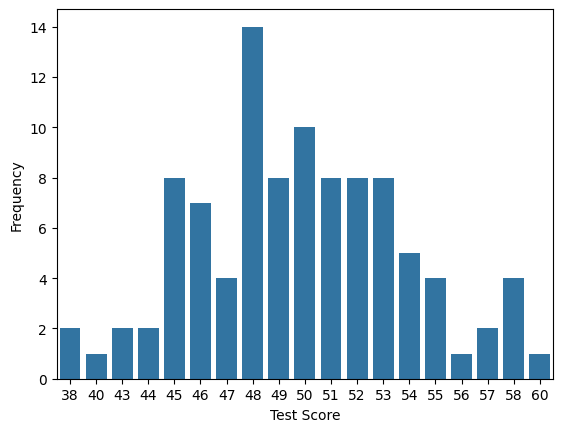

In [8]:
dataframe = test_score_distribution.DataFrame()

%matplotlib inline
# uncomment the following line if you get an module error saying seaborn not found
# !pip install seaborn==0.9.0
import seaborn

plot = seaborn.barplot(x='Test Score',y='Frequency', data=dataframe)

Now you know how to work with Db2 from within JupyterLab notebooks using SQL "magic"!


In [9]:
%%sql 

-- Feel free to experiment with the data set provided in this notebook for practice:
SELECT country, first_name, last_name, test_score FROM INTERNATIONAL_STUDENT_TEST_SCORES;    

 * ibm_db_sa://hdf12263:***@9938aec0-8105-433e-8bf9-0fbb7e483086.c1ogj3sd0tgtu0lqde00.databases.appdomain.cloud:32459/bludb?security=SSL
Done.


country,first_name,last_name,test_score
United States,Marshall,Bernadot,54
Ghana,Celinda,Malkin,51
Ukraine,Guillermo,Furze,53
Greece,Aharon,Tunnow,48
Russia,Bail,Goodwin,46
Poland,Cole,Winteringham,49
Sweden,Emlyn,Erricker,55
Russia,Cathee,Sivewright,49
China,Barny,Ingerson,57
Uganda,Sharla,Papaccio,55


## Author

<a href="https://www.linkedin.com/in/ravahuja/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDB0201ENSkillsNetwork22-2022-01-01" target="_blank">Rav Ahuja</a>



## Change Log


|  Date (YYYY-MM-DD) |  Version | Changed By  |  Change Description |
|---|---|---|---|
| 2021-11-17  | 2.3  | Lakshmi  | Updated library  |
| 2021-07-09 | 2.2 | Malika | Updated sql magic connection string and screenshot | 
| 2021-05-06 | 2.1 |Malika Singla | Added libraries |
| 2020-07-17  | 2.0  | Lavanya  |  Moved lab to course repo in GitLab |



## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
